In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import DeltaVar as dv
import SpectralSynthesis as ss
import tqdm as tqdm

In [2]:
H_list = np.linspace(0.0,1.0,11)
sigma_list = np.array([0.5,1.0,2.0,3.0])

print(H_list)
print(sigma_list)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.5 1.  2.  3. ]


In [3]:
import time

In [4]:
N_fields = 1
N_p = 128
E = 2

L = 10**(np.linspace(-2,-0.01, 100))
L_range = 10**(np.linspace(-1.8,-1.25,100))
v = 1.5

In [ ]:
for s in sigma_list:
    f,ax = plt.subplots(dpi=200)
    for H in H_list:
        for n in range(0,N_fields):
            field = ss.fBm(N=N_p*4, E=E, H=H, sigma=s)
            field = field[int((N_p*4-N_p)/2):int((N_p*4+N_p)/2),int((N_p*4-N_p)/2):int((N_p*4+N_p)/2)]
            sigma_d = [dv.DeltaVar(field, l, v, periodicity = False) for l in L]
            sigma_d_range = [dv.DeltaVar(field, l, v, periodicity = False) for l in L_range]
            h = dv.HurstEstimator(sigma_d_range,L_range)
            ax.plot(np.log10(L),np.log10(sigma_d),label=r'$H_{derived}=$'+'{:.2f}'.format(h[0])+', '+r'$H_{true}=$'+'{:.2f}'.format(H))
    ax.axvspan(np.log10(L_range[0]),np.log10(L_range[-1]), color = 'red', alpha = 0.2)
    plt.xlabel(r'$\log_{10}(L)$')
    plt.ylabel(r'$\log_{10}(\sigma^2_\Delta(L))$')
    plt.title(s)
    plt.legend(prop={'size': 6},loc=4)
    #plt.savefig("C:/Users/C1764397/Workshop/PhD/Meetings/AntMeeting_2018_10_16/Exponentiated-NonPeriodic-Sigma-{}-fbm-DV-{}.png".format(s,int(time.time())))
plt.show()

In [ ]:
from tqdm import tqdm

In [ ]:
N_fields = 400

H_curves = []
for s in sigma_list:
    H_curves_i = []
    for h in tqdm(H_list):
        h_calculated = []
        for n in range(0,N_fields):
            field = ss.fBm(N=N_p*4, E=E, H=h, sigma=s)
            field = field[int((N_p*4-N_p)/2):int((N_p*4+N_p)/2),int((N_p*4-N_p)/2):int((N_p*4+N_p)/2)]
            sigma_d_range = [dv.DeltaVar(field, l, v, periodicity = False) for l in L_range]
            h_calculated.append(dv.HurstEstimator(sigma_d_range,L_range)[0])
        h_avg = np.mean(h_calculated)
        h_std = np.std(h_calculated)
        H_curves_i.append([h,h_avg,h_std])
    H_curves_i = np.asarray(H_curves_i)
    H_curves.append(H_curves_i)
print(np.asarray(H_curves))

In [ ]:
for i in range(sigma_list.size):
    print(H_curves[i])
    np.savetxt('C:/Users/C1764397/Workshop/PhD/Data/SigmaEffectOnDV/H_calcs_Sigma_{}.txt'.format(sigma_list[i]),H_curves[i])

In [5]:
import os

In [6]:
H_curves = []
DATADIR = 'D:/SigmaEffectOnDV'
for file in os.listdir(DATADIR):
    H_curves.append(np.loadtxt(os.path.join(DATADIR,file)))

H_curves=np.asarray(H_curves)
print(H_curves)

[[[ 0.         -0.01525532  0.0415632 ]
  [ 0.1         0.08730299  0.04485005]
  [ 0.2         0.19340255  0.04712014]
  [ 0.3         0.30474547  0.04562484]
  [ 0.4         0.40192078  0.04433356]
  [ 0.5         0.50846343  0.04618622]
  [ 0.6         0.61752605  0.04827065]
  [ 0.7         0.71642961  0.0492917 ]
  [ 0.8         0.82240522  0.04734212]
  [ 0.9         0.92613529  0.04709247]
  [ 1.          1.03718321  0.05245932]]

 [[ 0.         -0.07152724  0.07374738]
  [ 0.1         0.03910479  0.069509  ]
  [ 0.2         0.16175563  0.06786298]
  [ 0.3         0.28629957  0.07237155]
  [ 0.4         0.39458968  0.06516721]
  [ 0.5         0.50295738  0.06355676]
  [ 0.6         0.61396303  0.06482014]
  [ 0.7         0.72123988  0.06141031]
  [ 0.8         0.82608101  0.06280381]
  [ 0.9         0.93182933  0.06260593]
  [ 1.          1.03941775  0.05973121]]

 [[ 0.         -0.28020787  0.11942815]
  [ 0.1        -0.10634807  0.125292  ]
  [ 0.2         0.03882153  0.112279

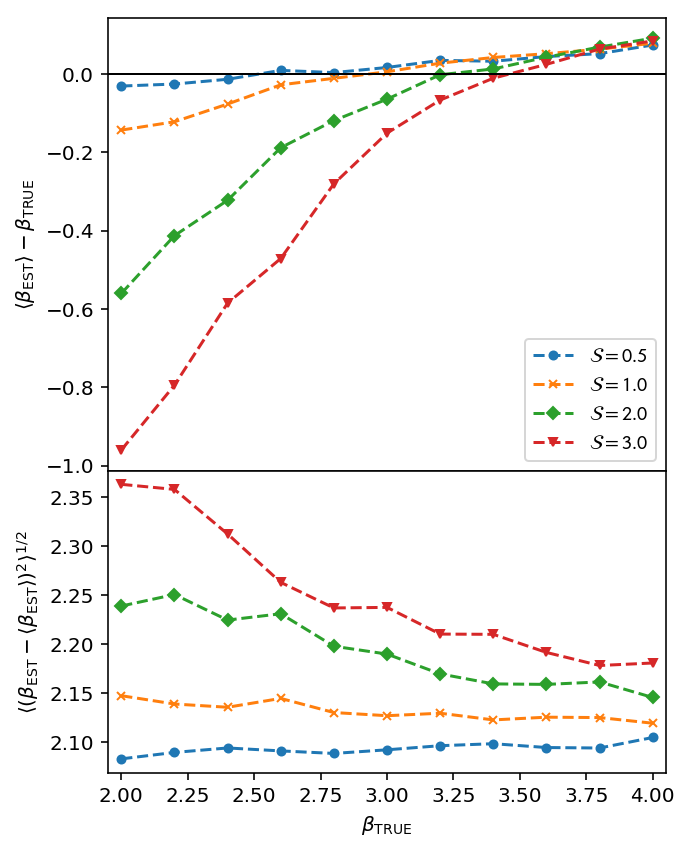

"\nplt.plot([0,1],[0,1], 'k-.', linewidth = 1)\nplt.xlabel(r'$H_{true}$')\nplt.ylabel(r'$H_{derived}$')\nplt.legend()\nplt.tight_layout()\nplt.savefig('D:/Bates_Lomax_Whitworth_Paper/SIGMA_DV_PLOT.png')"

In [10]:
fig,(ax1,ax2) = plt.subplots(nrows=2, figsize=(720/144, 1000/144), dpi=144, sharex = True, gridspec_kw={"height_ratios":[1.5, 1]})
markers = ['o','x','D','v']
ms=4

for i in range(sigma_list.size):
    ax1.plot(H_curves[i][:,0]*2+2,H_curves[i][:,1]*2-H_curves[i][:,0]*2, '--',
                 marker=markers[i],ms=ms, label = r'$\cal S = {}$'.format(sigma_list[i]))
    ax2.plot(H_curves[i][:,0]*2+2,H_curves[i][:,2]*2+2, '--', marker=markers[i],ms=ms,label = r'$\cal S = {}$'.format(sigma_list[i]))
    

ax1.plot([-1,5],[0,0], 'k-', linewidth = 1)
ax1.set_xlim([1.95,4.05])
ax1.legend()
ax1.set_ylabel(r'$\langle{\beta}_{\rm EST}\rangle-{\beta}_{\rm TRUE}$')
ax2.set_xlabel(r'${\beta}_{\rm TRUE}$')
ax2.set_ylabel(r'$\langle({\beta}_{\rm EST}-\langle{\beta}_{\rm EST}\rangle)^2\rangle^{1/2}$')
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig('D:/Bates_Lomax_Whitworth_Paper/SIGMA_DV_PLOT.png', bbox_inches = 'tight')
plt.show()

'''
plt.plot([0,1],[0,1], 'k-.', linewidth = 1)
plt.xlabel(r'$H_{true}$')
plt.ylabel(r'$H_{derived}$')
plt.legend()
plt.tight_layout()
plt.savefig('D:/Bates_Lomax_Whitworth_Paper/SIGMA_DV_PLOT.png')'''